In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Online Retail.csv')

In [3]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
print(df.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce', dayfirst=True)
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

In [8]:
df.dtypes


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [11]:
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

In [12]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [17]:
# Check for duplicate rows
print(df.duplicated().sum())


0


In [14]:
# Remove duplicate rows
df = df.drop_duplicates()


In [18]:
df.size

4293128

In [20]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [21]:
# Create new feature: Total Purchase (Quantity * UnitPrice)
df['TotalPurchase'] = df['Quantity'] * df['UnitPrice']

# Group by CustomerID and aggregate the data
customer_df = df.groupby('CustomerID').agg(
    TotalSpend=('TotalPurchase', 'sum'),
    Frequency=('InvoiceNo', 'nunique'),
    Recency=('InvoiceDate', 'max')
).reset_index()

# Calculate Recency in days (difference between current date and last purchase date)
customer_df['Recency'] = (pd.to_datetime('today') - customer_df['Recency']).dt.days

# Calculate Average Order Value (Total Spend / Frequency)
customer_df['AvgOrderValue'] = customer_df['TotalSpend'] / customer_df['Frequency']




   CustomerID  TotalSpend  Frequency  Recency  AvgOrderValue
0     12346.0        0.00          2     5056       0.000000
1     12347.0     4310.00          7     4732     615.714286
2     12348.0     1797.24          4     4805     449.310000
3     12349.0     1757.55          1     4749    1757.550000
4     12350.0      334.40          1     5040     334.400000


C:\Users\HP\AppData\Local\Temp\ipykernel_84308\422632872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPurchase'] = df['Quantity'] * df['UnitPrice']


In [22]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [27]:
customer_df.head(3)

,CustomerID,TotalSpend,Frequency,Recency,AvgOrderValue
0,12346.0,0.00,2,5056,0.000000
1,12347.0,4310.00,7,4732,615.714286
2,12348.0,1797.24,4,4805,449.310000


In [26]:
customer_df.size

21860

In [28]:
print(customer_df.isnull().sum())

CustomerID       0
TotalSpend       0
Frequency        0
Recency          0
AvgOrderValue    0
dtype: int64


In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
customer_df[['TotalSpend', 'Frequency', 'Recency', 'AvgOrderValue']] = scaler.fit_transform(
    customer_df[['TotalSpend', 'Frequency', 'Recency', 'AvgOrderValue']]
)

# Show the scaled data
print(customer_df.head())


   CustomerID  TotalSpend  Frequency   Recency  AvgOrderValue
0     12346.0   -0.230420  -0.329362  2.322988      -0.871620
1     12347.0    0.294055   0.206102 -0.892539       0.834839
2     12348.0   -0.011717  -0.115176 -0.168053       0.373647
3     12349.0   -0.016547  -0.436455 -0.723823       3.999448
4     12350.0   -0.189727  -0.436455  2.164196       0.055173


In [30]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction (reduce to 2 components)
pca = PCA(n_components=2)
customer_df[['PCA1', 'PCA2']] = pca.fit_transform(customer_df[['TotalSpend', 'Frequency', 'Recency', 'AvgOrderValue']])

# Check the transformed data with reduced dimensions
print(customer_df[['CustomerID', 'PCA1', 'PCA2']].head())


   CustomerID      PCA1      PCA2
0     12346.0 -1.423867  1.056397
1     12347.0  0.928462 -0.069530
2     12348.0  0.132830  0.160539
3     12349.0  1.606768  2.208071
4     12350.0 -1.029310  1.585020


In [31]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(customer_df[['TotalSpend', 'Frequency', 'Recency', 'AvgOrderValue']])

# Keep only rows with Z-scores between -3 and 3
customer_df = customer_df[(z_scores < 3).all(axis=1)]

# Show the data without outliers
print(customer_df.head())


   CustomerID  TotalSpend  Frequency   Recency  AvgOrderValue      PCA1  \
0     12346.0   -0.230420  -0.329362  2.322988      -0.871620 -1.423867   
1     12347.0    0.294055   0.206102 -0.892539       0.834839  0.928462   
2     12348.0   -0.011717  -0.115176 -0.168053       0.373647  0.132830   
4     12350.0   -0.189727  -0.436455  2.164196       0.055173 -1.029310   
5     12352.0   -0.042362   0.634474 -0.555107      -0.482245  0.312139   

       PCA2  
0  1.056397  
1 -0.069530  
2  0.160539  
4  1.585020  
5 -0.890244  


In [32]:
print(customer_df.head())


   CustomerID  TotalSpend  Frequency   Recency  AvgOrderValue      PCA1  \
0     12346.0   -0.230420  -0.329362  2.322988      -0.871620 -1.423867   
1     12347.0    0.294055   0.206102 -0.892539       0.834839  0.928462   
2     12348.0   -0.011717  -0.115176 -0.168053       0.373647  0.132830   
4     12350.0   -0.189727  -0.436455  2.164196       0.055173 -1.029310   
5     12352.0   -0.042362   0.634474 -0.555107      -0.482245  0.312139   

       PCA2  
0  1.056397  
1 -0.069530  
2  0.160539  
4  1.585020  
5 -0.890244  


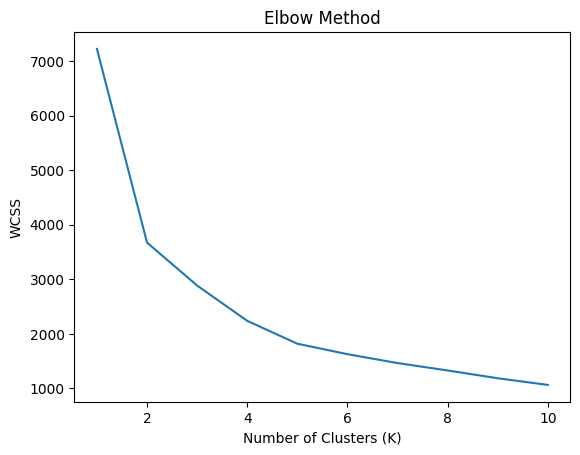

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# List to store the WCSS values for different K values
wcss = []

# Try different values of K (from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(customer_df[['TotalSpend', 'Frequency', 'Recency', 'AvgOrderValue']])
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [34]:
# Let's assume K=4 after using the Elbow Method or Silhouette Score
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model
kmeans.fit(customer_df[['TotalSpend', 'Frequency', 'Recency', 'AvgOrderValue']])

# Assign the cluster labels to the customer dataframe
customer_df['Cluster'] = kmeans.labels_

# Show the first few rows with cluster labels
print(customer_df.head())


   CustomerID  TotalSpend  Frequency   Recency  AvgOrderValue      PCA1  \
0     12346.0   -0.230420  -0.329362  2.322988      -0.871620 -1.423867   
1     12347.0    0.294055   0.206102 -0.892539       0.834839  0.928462   
2     12348.0   -0.011717  -0.115176 -0.168053       0.373647  0.132830   
4     12350.0   -0.189727  -0.436455  2.164196       0.055173 -1.029310   
5     12352.0   -0.042362   0.634474 -0.555107      -0.482245  0.312139   

       PCA2  Cluster  
0  1.056397        4  
1 -0.069530        2  
2  0.160539        1  
4  1.585020        4  
5 -0.890244        3  


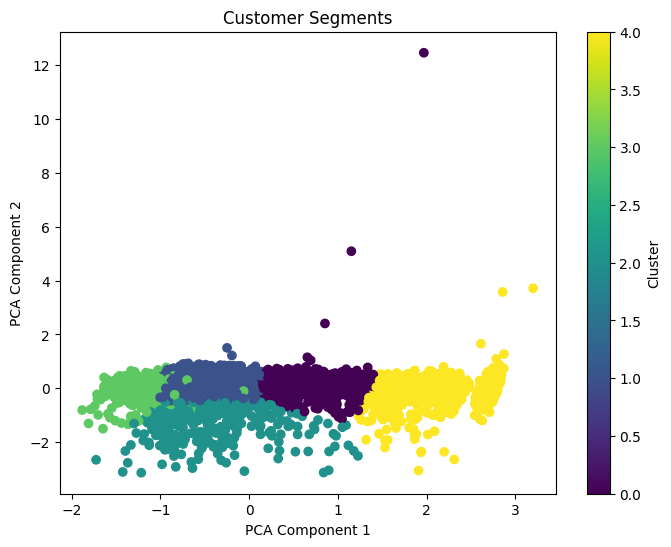

In [35]:
# Use PCA for dimensionality reduction (if not already done)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
customer_df[['PCA1', 'PCA2']] = pca.fit_transform(customer_df[['TotalSpend', 'Frequency', 'Recency', 'AvgOrderValue']])

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(customer_df['PCA1'], customer_df['PCA2'], c=customer_df['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [36]:
# Check the centroids of each cluster
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['TotalSpend', 'Frequency', 'Recency', 'AvgOrderValue'])
print(cluster_centroids)


   TotalSpend  Frequency   Recency  AvgOrderValue
0   -0.170409  -0.281038  0.679225      -0.318127
1   -0.128008  -0.153921 -0.567733      -0.229591
2    0.071619  -0.172992 -0.337945       1.114889
3    0.346297   1.180493 -0.756960      -0.056447
4   -0.188189  -0.382206  2.035975      -0.222338


In [37]:
print(f"Inertia: {kmeans.inertia_}")


Inertia: 1819.5116537013291


In [38]:
# Group data by the cluster labels
cluster_profiles = customer_df.groupby('Cluster').agg({
    'TotalSpend': ['mean', 'median', 'std'],
    'Frequency': ['mean', 'median', 'std'],
    'Recency': ['mean', 'median', 'std'],
    'AvgOrderValue': ['mean', 'median', 'std']
})
print(cluster_profiles)


        TotalSpend                     Frequency                      \
              mean    median       std      mean    median       std   
Cluster                                                                
0        -0.170409 -0.188667  0.067317 -0.281038 -0.329362  0.198387   
1        -0.127938 -0.152098  0.084794 -0.154073 -0.222269  0.257549   
2         0.071352 -0.001622  0.292025 -0.173857 -0.222269  0.286725   
3         0.345562  0.247177  0.355845  1.178927  0.955753  0.608082   
4        -0.188189 -0.199831  0.061955 -0.382206 -0.436455  0.124000   

          Recency                     AvgOrderValue                      
             mean    median       std          mean    median       std  
Cluster                                                                  
0        0.679225  0.665602  0.366471     -0.318127 -0.369930  0.622161  
1       -0.567761 -0.624578  0.256534     -0.229236 -0.276169  0.301597  
2       -0.336656 -0.426089  0.481900      1.116311  

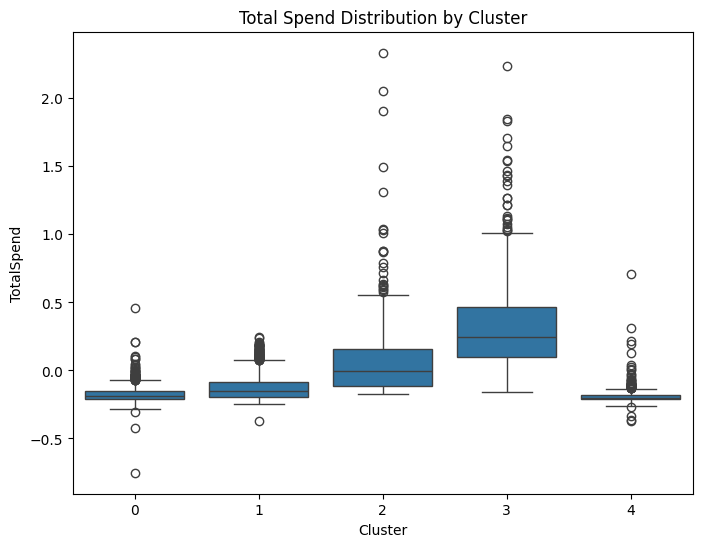

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='Cluster', y='TotalSpend', data=customer_df)
plt.title('Total Spend Distribution by Cluster')
plt.show()


In [41]:
cluster_labels = {
    0: 'High-Value Customers',
    1: 'Low-Value Customers',
    2: 'Frequent Shoppers',
    3: 'Inactive Customers'
}

customer_df['Cluster_Label'] = customer_df['Cluster'].map(cluster_labels)


In [42]:
customer_df.head(7)

,CustomerID,TotalSpend,Frequency,Recency,AvgOrderValue,PCA1,PCA2,Cluster,Cluster_Label
0,12346.0,-0.230420,-0.329362,2.322988,-0.871620,2.375625,0.509215,4,NaN
1,12347.0,0.294055,0.206102,-0.892539,0.834839,-1.069080,-0.849215,2,Frequent Shoppers
2,12348.0,-0.011717,-0.115176,-0.168053,0.373647,-0.217758,-0.440064,1,Low-Value Customers
4,12350.0,-0.189727,-0.436455,2.164196,0.055173,2.148194,-0.386852,4,NaN
5,12352.0,-0.042362,0.634474,-0.555107,-0.482245,-0.679661,0.451385,3,Inactive Customers
6,12353.0,-0.219589,-0.436455,1.112203,-0.624955,1.213710,0.413987,0,High-Value Customers
7,12354.0,-0.099070,-0.436455,1.390088,2.119948,1.179934,-2.331823,2,Frequent Shoppers


In [47]:
 customer_df['Cluster_Label'].value_counts()



Cluster_Label
Low-Value Customers     2109
High-Value Customers     687
Frequent Shoppers        438
Inactive Customers       417
Name: count, dtype: int64

In [49]:
 customer_df['Cluster_Label'].isnull().sum()

610

In [50]:
import joblib

# Assuming you used KMeans for clustering
joblib.dump(kmeans, 'customer_segmentation_model.pkl')


['customer_segmentation_model.pkl']